In [1]:
# the default additions to my notebook
import pandas as pd
import numpy as np
# custom files used to import functions created by me and tailored for the telco dataset
import acquire
import prepare
import explore
# matplotlib and seaborn are added for visuals
import matplotlib.pyplot as plt
import seaborn as sns
# stats is added for any computational work that needs to be done
from scipy import stats
# utilized for creating a decision tree model and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
telco.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

- senior citizen: Whether someone is considered a senior citizen or not (Yes = 1 | No = 0)
- partner: Whether someone has a partner or not (Yes = 1 | No = 0)
- dependents: Whether someone has dependents on the account or not (Yes = 1 | No = 0)
- tenure:  How long a customer has been with Telco
- phone service: Whether a customer has phone service with telco or not (Yes = 1 | No = 0)
- multiple lines: Whether a customer has multiples lines, one line, or no phone service at all
- online_security: Whether a customer has online security, no onlines security, or no internet service at all
- online backup: Whether a customer has online backup, no online backup, or no internet service at all
- device protection: Whether a customer has device protection, no device protection, or no internet service at all
- tech support: Whether a customer has technical suppport or not (Yes = 1 | No = 0)
- streaming tv: Does the customer stream tv with their account (Yes = 1 | No = 0)
- streaming movies: Does the customer stream movies with their account (Yes = 1 | No = 0)
- paperless billing: Does the customer utilize electronic billing or not (Yes = 1 | No = 0)
- monthly charges:  The dollar amount a customer pays each month
- total charges:  The dollar amount the customer has paid altogether since opening an account
- churn: Whether the customer has ended services with Telco or not (Yes = 1 | No = 0)
- contract type: whether the customer is in a one year, two year, or month to month contract
- internet service type:  whether the customer uses DSL, fiber optic, or no internet
- payment type: whether a customer pays via electronic check, mailed check, bank transfer, or credit card

In [4]:
telco = prepare.prep_telco(telco)
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_female,has_partner,has_dependents,has_phone_service,has_paperless_billing,has_churned,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,1,1,1,1,1,0,...,1,1,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,0,1,0,1,1,1,...,0,1,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,1,1,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1


In [5]:
telco.has_churned.value_counts()

0    5174
1    1869
Name: has_churned, dtype: int64

In [6]:
telco.isna().mean()

senior_citizen                          0.0
tenure                                  0.0
monthly_charges                         0.0
total_charges                           0.0
is_female                               0.0
has_partner                             0.0
has_dependents                          0.0
has_phone_service                       0.0
has_paperless_billing                   0.0
has_churned                             0.0
multiple_lines_Yes                      0.0
online_security_Yes                     0.0
online_backup_Yes                       0.0
device_protection_Yes                   0.0
tech_support_Yes                        0.0
streaming_tv_Yes                        0.0
streaming_movies_Yes                    0.0
contract_type_One year                  0.0
contract_type_Two year                  0.0
internet_service_type_Fiber optic       0.0
internet_service_type_None              0.0
payment_type_Credit card (automatic)    0.0
payment_type_Electronic check   

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   senior_citizen                        7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   monthly_charges                       7043 non-null   float64
 3   total_charges                         7043 non-null   float64
 4   is_female                             7043 non-null   int64  
 5   has_partner                           7043 non-null   int64  
 6   has_dependents                        7043 non-null   int64  
 7   has_phone_service                     7043 non-null   int64  
 8   has_paperless_billing                 7043 non-null   int64  
 9   has_churned                           7043 non-null   int64  
 10  multiple_lines_Yes                    7043 non-null   uint8  
 11  online_security_Y

In [8]:
for col in telco.columns:
    print(telco[col].value_counts())
    print()

0    5901
1    1142
Name: senior_citizen, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

0    3555
1    3488
Name: is_female, dtype: int64

0    3641
1    3402
Name: has_partner, dtype: int64

0    4933
1    2110
Name: has_dependents, dtype: int64

1    6361
0     682
Name: has_phone_service, dtype: int64

1    4171
0    2872
Name: has_paperless_billing, dtype: int64

0    5174
1    1869
Name: has_churned, dtype: int64

0    4072
1    2971
Name: multiple_lines_Yes, dtype: int64

0 

In [9]:
train, validate, test = prepare.my_train_test_split(telco, 'has_churned')

In [10]:
train.shape, validate.shape, test.shape

((4225, 24), (1409, 24), (1409, 24))

In [11]:
num_type_list, cat_type_list = explore.dtypes_to_list(train)

In [12]:
num_type_list

['monthly_charges', 'total_charges']

In [13]:
cat_type_list

['senior_citizen',
 'tenure',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'has_churned',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [14]:
cat_type_list.remove('has_churned')

In [15]:
cat_type_list

['senior_citizen',
 'tenure',
 'is_female',
 'has_partner',
 'has_dependents',
 'has_phone_service',
 'has_paperless_billing',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

senior_citizen
0    3541
1     684
Name: senior_citizen, dtype: int64
0    83.810651
1    16.189349
Name: senior_citizen, dtype: float64


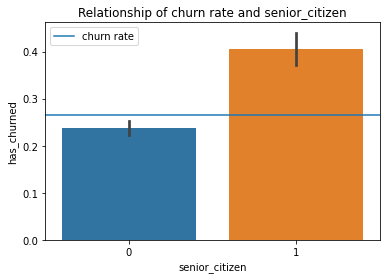

We reject the null hypothesis that senior_citizen and churn rate are independent
There is a relationship between churn rate and senior_citizen

tenure
1     358
72    217
2     143
3     112
71    106
     ... 
43     32
44     31
45     31
36     30
0       9
Name: tenure, Length: 73, dtype: int64
1     8.473373
72    5.136095
2     3.384615
3     2.650888
71    2.508876
        ...   
43    0.757396
44    0.733728
45    0.733728
36    0.710059
0     0.213018
Name: tenure, Length: 73, dtype: float64


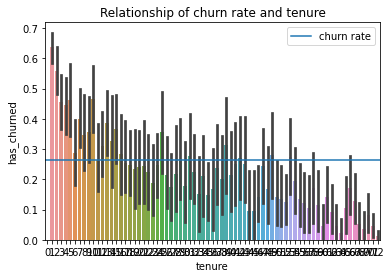

We reject the null hypothesis that tenure and churn rate are independent
There is a relationship between churn rate and tenure

is_female
0    2149
1    2076
Name: is_female, dtype: int64
0    50.863905
1    49.136095
Name: is_female, dtype: float64


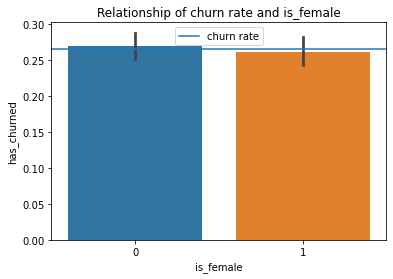

We fail to reject the null hypothesis that is_female and churn rate are independent
There appears to be no relationship between churn rate and is_female

has_partner
0    2161
1    2064
Name: has_partner, dtype: int64
0    51.147929
1    48.852071
Name: has_partner, dtype: float64


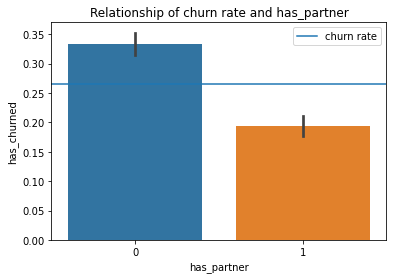

We reject the null hypothesis that has_partner and churn rate are independent
There is a relationship between churn rate and has_partner

has_dependents
0    2931
1    1294
Name: has_dependents, dtype: int64
0    69.372781
1    30.627219
Name: has_dependents, dtype: float64


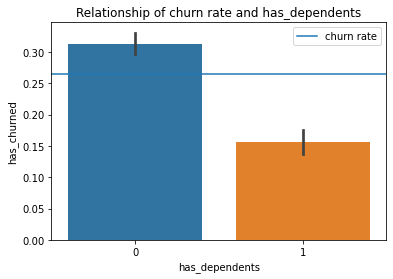

We reject the null hypothesis that has_dependents and churn rate are independent
There is a relationship between churn rate and has_dependents

has_phone_service
1    3832
0     393
Name: has_phone_service, dtype: int64
1    90.698225
0     9.301775
Name: has_phone_service, dtype: float64


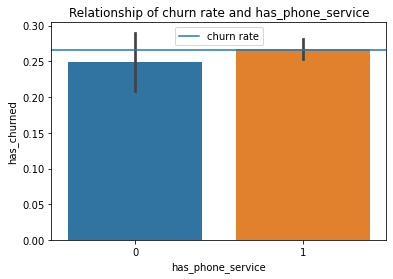

We fail to reject the null hypothesis that has_phone_service and churn rate are independent
There appears to be no relationship between churn rate and has_phone_service

has_paperless_billing
1    2509
0    1716
Name: has_paperless_billing, dtype: int64
1    59.384615
0    40.615385
Name: has_paperless_billing, dtype: float64


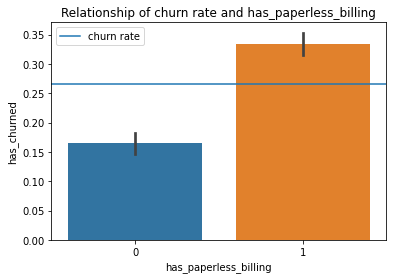

We reject the null hypothesis that has_paperless_billing and churn rate are independent
There is a relationship between churn rate and has_paperless_billing

multiple_lines_Yes
0    2418
1    1807
Name: multiple_lines_Yes, dtype: int64
0    57.230769
1    42.769231
Name: multiple_lines_Yes, dtype: float64


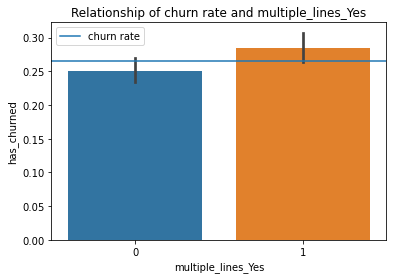

We reject the null hypothesis that multiple_lines_Yes and churn rate are independent
There is a relationship between churn rate and multiple_lines_Yes

online_security_Yes
0    2993
1    1232
Name: online_security_Yes, dtype: int64
0    70.840237
1    29.159763
Name: online_security_Yes, dtype: float64


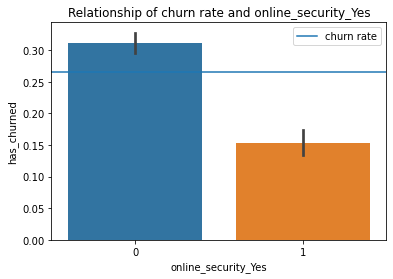

We reject the null hypothesis that online_security_Yes and churn rate are independent
There is a relationship between churn rate and online_security_Yes

online_backup_Yes
0    2746
1    1479
Name: online_backup_Yes, dtype: int64
0    64.994083
1    35.005917
Name: online_backup_Yes, dtype: float64


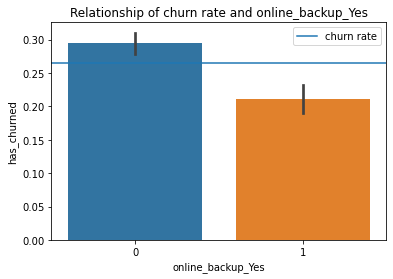

We reject the null hypothesis that online_backup_Yes and churn rate are independent
There is a relationship between churn rate and online_backup_Yes

device_protection_Yes
0    2742
1    1483
Name: device_protection_Yes, dtype: int64
0    64.899408
1    35.100592
Name: device_protection_Yes, dtype: float64


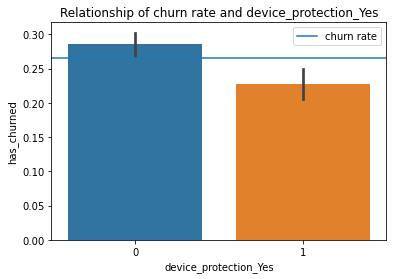

We reject the null hypothesis that device_protection_Yes and churn rate are independent
There is a relationship between churn rate and device_protection_Yes

tech_support_Yes
0    3002
1    1223
Name: tech_support_Yes, dtype: int64
0    71.053254
1    28.946746
Name: tech_support_Yes, dtype: float64


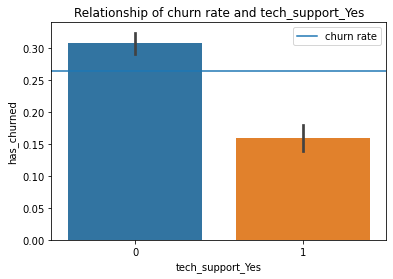

We reject the null hypothesis that tech_support_Yes and churn rate are independent
There is a relationship between churn rate and tech_support_Yes

streaming_tv_Yes
0    2568
1    1657
Name: streaming_tv_Yes, dtype: int64
0    60.781065
1    39.218935
Name: streaming_tv_Yes, dtype: float64


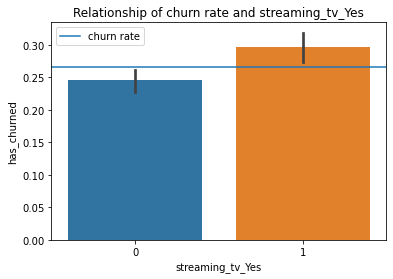

We reject the null hypothesis that streaming_tv_Yes and churn rate are independent
There is a relationship between churn rate and streaming_tv_Yes

streaming_movies_Yes
0    2554
1    1671
Name: streaming_movies_Yes, dtype: int64
0    60.449704
1    39.550296
Name: streaming_movies_Yes, dtype: float64


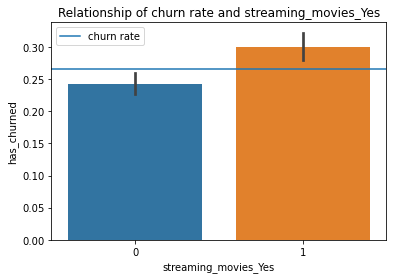

We reject the null hypothesis that streaming_movies_Yes and churn rate are independent
There is a relationship between churn rate and streaming_movies_Yes

contract_type_One year
0    3312
1     913
Name: contract_type_One year, dtype: int64
0    78.390533
1    21.609467
Name: contract_type_One year, dtype: float64


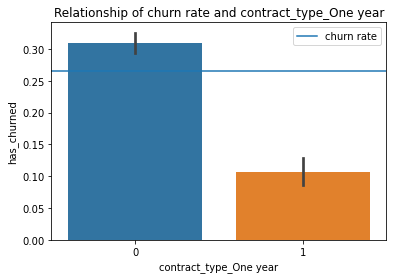

We reject the null hypothesis that contract_type_One year and churn rate are independent
There is a relationship between churn rate and contract_type_One year

contract_type_Two year
0    3230
1     995
Name: contract_type_Two year, dtype: int64
0    76.449704
1    23.550296
Name: contract_type_Two year, dtype: float64


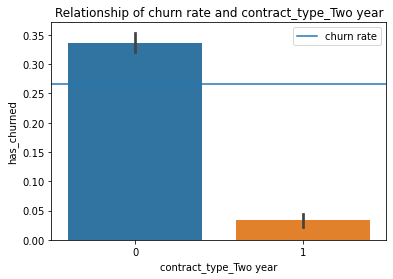

We reject the null hypothesis that contract_type_Two year and churn rate are independent
There is a relationship between churn rate and contract_type_Two year

internet_service_type_Fiber optic
0    2370
1    1855
Name: internet_service_type_Fiber optic, dtype: int64
0    56.094675
1    43.905325
Name: internet_service_type_Fiber optic, dtype: float64


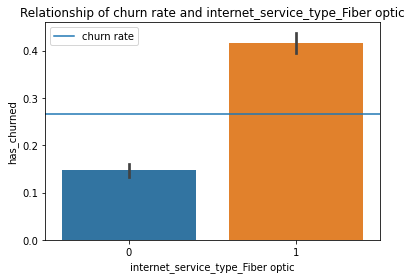

We reject the null hypothesis that internet_service_type_Fiber optic and churn rate are independent
There is a relationship between churn rate and internet_service_type_Fiber optic

internet_service_type_None
0    3302
1     923
Name: internet_service_type_None, dtype: int64
0    78.153846
1    21.846154
Name: internet_service_type_None, dtype: float64


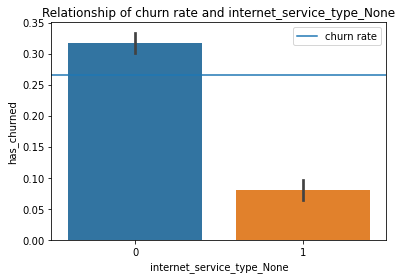

We reject the null hypothesis that internet_service_type_None and churn rate are independent
There is a relationship between churn rate and internet_service_type_None

payment_type_Credit card (automatic)
0    3306
1     919
Name: payment_type_Credit card (automatic), dtype: int64
0    78.248521
1    21.751479
Name: payment_type_Credit card (automatic), dtype: float64


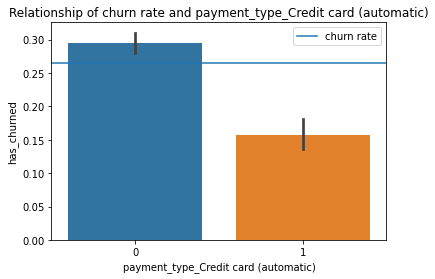

We reject the null hypothesis that payment_type_Credit card (automatic) and churn rate are independent
There is a relationship between churn rate and payment_type_Credit card (automatic)

payment_type_Electronic check
0    2802
1    1423
Name: payment_type_Electronic check, dtype: int64
0    66.319527
1    33.680473
Name: payment_type_Electronic check, dtype: float64


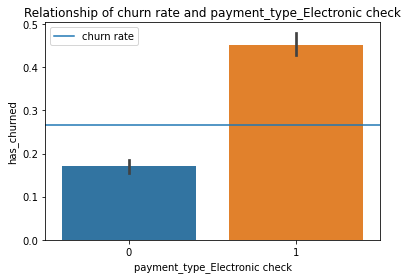

We reject the null hypothesis that payment_type_Electronic check and churn rate are independent
There is a relationship between churn rate and payment_type_Electronic check

payment_type_Mailed check
0    3275
1     950
Name: payment_type_Mailed check, dtype: int64
0    77.514793
1    22.485207
Name: payment_type_Mailed check, dtype: float64


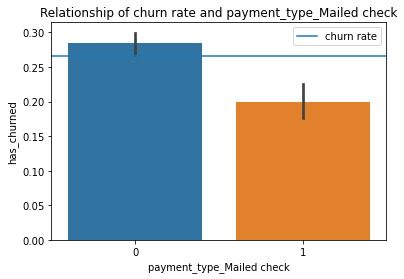

We reject the null hypothesis that payment_type_Mailed check and churn rate are independent
There is a relationship between churn rate and payment_type_Mailed check



In [16]:
for col in cat_type_list:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    explore.telco_analysis(train, col)
    print()

In [ ]:
# Gender and phone service seem to have little effect on whether a customer will churn or not 

# Do older customers without tech support churn more often than those with?

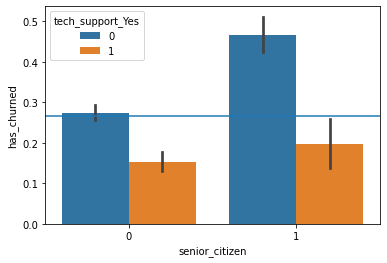

In [26]:
sns.barplot(x='senior_citizen', y='has_churned', hue= 'tech_support_Yes', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [20]:
# Seems that senior citizens without tech support are more prone to churn than those who do have tech support

# Does streaming movies vs streaming tv have any affect on the churn rate

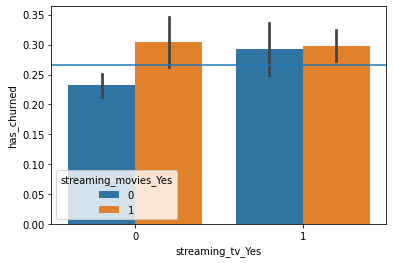

In [27]:
sns.barplot(x='streaming_tv_Yes', y='has_churned', hue= 'streaming_movies_Yes', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [19]:
# Seems that having both or one streaming services will cause more churn than having none.

# Does having dependents/a partner increase churn rate vs not having them?

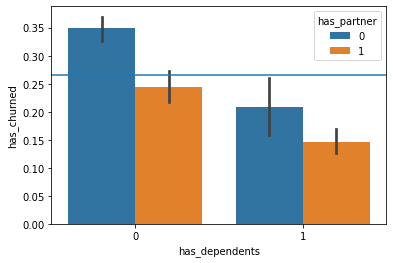

In [28]:
sns.barplot(x='has_dependents', y='has_churned', hue= 'has_partner', data=train)
churn_rate = train.has_churned.mean()
plt.axhline(churn_rate, label='churn rate')

In [25]:
# Customers with no partner and no dependents are more prone to churn than those who do have them

# How does monthly charges and tenure relate in terms of churn rate?

<AxesSubplot:xlabel='monthly_charges', ylabel='tenure'>

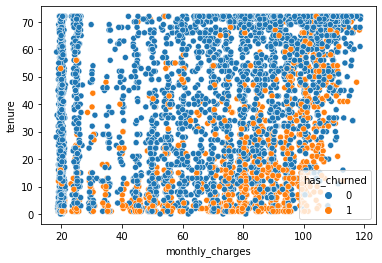

In [31]:
sns.scatterplot(x = 'monthly_charges', y='tenure', hue= 'has_churned', data = train)

In [32]:
# The higher the monthly charge the more likely the customer will churn thus leading to a low tenure value.

In [15]:
X_train = train.drop(columns = 'has_churned')
y_train = train.has_churned

In [16]:
print(f'The baseline accuracy for nonchurned customers in all cases within the telco dataset is {(y_train == 0).mean():.2}')

The baseline accuracy for nonchurned customers in all cases within the telco dataset is 0.73


In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(X_train)

In [22]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.997749,0.999103,0.998107,0.998426,0.998108
recall,0.999678,0.993756,0.998107,0.996717,0.998107
f1-score,0.998713,0.996422,0.998107,0.997567,0.998105
support,3104.000000,1121.000000,0.998107,4225.000000,4225.000000


In [23]:
clf2 = DecisionTreeClassifier(max_depth=10)

In [24]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [26]:
y_pred2 = clf2.predict(X_train)

In [28]:
pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.902987,0.824131,0.884734,0.863559,0.882065
recall,0.944588,0.719001,0.884734,0.831794,0.884734
f1-score,0.923319,0.767985,0.884734,0.845652,0.882105
support,3104.000000,1121.000000,0.884734,4225.000000,4225.000000


In [44]:
X_train2 = train.drop(columns=(['has_churned', 'is_female', 'has_phone_service']))
y_train2 = train.has_churned
X_validate = validate.drop(columns=(['has_churned', 'is_female', 'has_phone_service']))
y_validate = validate.has_churned
X_test = test.drop(columns=(['has_churned', 'is_female', 'has_phone_service']))
y_test = test.has_churned

In [31]:
clf3 = DecisionTreeClassifier()

In [32]:
clf3.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [33]:
y_pred3 = clf3.predict(X_train2)

In [34]:
pd.DataFrame(classification_report(y_train2, y_pred3, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996788,0.999101,0.997396,0.997944,0.997401
recall,0.999678,0.991079,0.997396,0.995379,0.997396
f1-score,0.998231,0.995074,0.997396,0.996652,0.997393
support,3104.000000,1121.000000,0.997396,4225.000000,4225.000000


In [40]:
clf4 = DecisionTreeClassifier(max_depth=10)

In [41]:
clf4.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=10)

In [42]:
y_pred4 = clf4.predict(X_train2)

In [43]:
pd.DataFrame(classification_report(y_train2, y_pred4, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.901443,0.826446,0.88426,0.863945,0.881544
recall,0.945876,0.713649,0.88426,0.829762,0.884260
f1-score,0.923125,0.765917,0.88426,0.844521,0.881414
support,3104.000000,1121.000000,0.88426,4225.000000,4225.000000


In [45]:
pd.DataFrame(classification_report(y_validate, clf3.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.823356,0.497436,0.733144,0.660396,0.736845
recall,0.810628,0.518717,0.733144,0.664672,0.733144
f1-score,0.816943,0.507853,0.733144,0.662398,0.734899
support,1035.000000,374.000000,0.733144,1409.000000,1409.000000


In [46]:
pd.DataFrame(classification_report(y_validate, clf4.predict(X_validate), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.819013,0.558730,0.760823,0.688871,0.749924
recall,0.865700,0.470588,0.760823,0.668144,0.760823
f1-score,0.841710,0.510885,0.760823,0.676298,0.753897
support,1035.000000,374.000000,0.760823,1409.000000,1409.000000
